In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2012)

C:\Users\sushil.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_train.shape)
print('min' , np.min(X_test), 'max : ', np.max(X_test))

(60000, 28, 28)
(60000, 28, 28)
min 0 max :  255


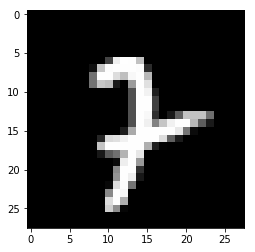

In [3]:
randon_idx = np.random.randint(1000)
plt.imshow(X_test[randon_idx, :, :], cmap='Greys_r' )
plt.show()

In [4]:
#reshape
trainX =  np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
testX =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# testX =  np.reshape(X_test, [X_test.shape[0]], (X_test.shape[1] * X_test.shape[2]))
print(testX.shape)
print(trainX.shape)


(10000, 784)
(60000, 784)


In [5]:
print(Y_train[0:10])
print(Y_test.shape)
print(X_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(10000,)
(60000, 28, 28)


In [6]:
#Convert One Hot Encoding
Y_test = np_utils.to_categorical(Y_test,  10)
Y_train = np_utils.to_categorical(Y_train,  10)
print(Y_test.shape)
print(Y_train.shape)


(10000, 10)
(60000, 10)


In [11]:
#Model
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(Dense(10, activation='softmax', use_bias=True))

In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(trainX, Y_train, epochs=1, batch_size=100)
# evaluate the model
scores = model.evaluate(testX, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'model' is not defined

In [7]:
#TEST
model1 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model1.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu', use_bias=True, ))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax', use_bias=True))
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model1.fit(trainX, Y_train, epochs=1, batch_size=100)
# evaluate the model
scores = model1.evaluate(testX, Y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Epoch 1/1
10000/10000 [==============================] - 3s 255us/step

acc: 82.27%


In [11]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
